*   Data from Macromolecules 2014, 47, 6453−6461 (dx.doi.org/10.1021/ma500923r)
*   Note the order of angles are different from the original paper (mathematica code). 

```
Angle1 = -11 / 180 Pi;
Angle2 = 14 / 180 Pi;
Angle3 = 14 / 180 Pi;
Angle4 = -1.4 / 180 Pi;
Angle5 = -1.4 / 180 Pi;
Angle6 = 14 / 180 Pi;
Angle7 = 14 / 180 Pi;
Angle8 = -11 / 180 Pi;
Angle = {Angle1, Angle2, Angle3, Angle4, Angle5, Angle6, Angle7, Angle8}
```

*   In this repository, the last angle (Angle8) shall be moved to the first place. See:
```
Angle = np.deg2rad(np.array([-11, -11, 14, 14, -1.4, -1.4, 14, 14]))
```

In [4]:
import utils
import scipy.constants as sc
import numpy as np

temperature = 700  # K

kTval = sc.R * temperature / 1000  # kJ/mol

# molecular chain
# T-bond-DPP-bond-T-bond-T-bond-E-bond-T-bond
l = [6.951, 1.466, 2.540, 1.456, 2.967, 1.459, 2.513, 1.500]
# change the logic of bond order and angle order，l_array[1] rotated by angle[1]
Angle = np.deg2rad(np.array([-11, -11, 14, 14, -1.4, -1.4, 14, 14]))
rotation = np.array([0, 2, 0, 1, 0, 1, 0, 2])
labels = {
    1: {'label': 'dihedralA', 'color': 'b'},
    2: {'label': 'dihedralB', 'color': 'm'},
    # 3: {'label': 'T-E', 'color': 'c'},
    # 4: {"label": "FT-FT", "color": 'g'}, 
    # 5: {"label": "ADTDI-FT", "color": 'r'},
}

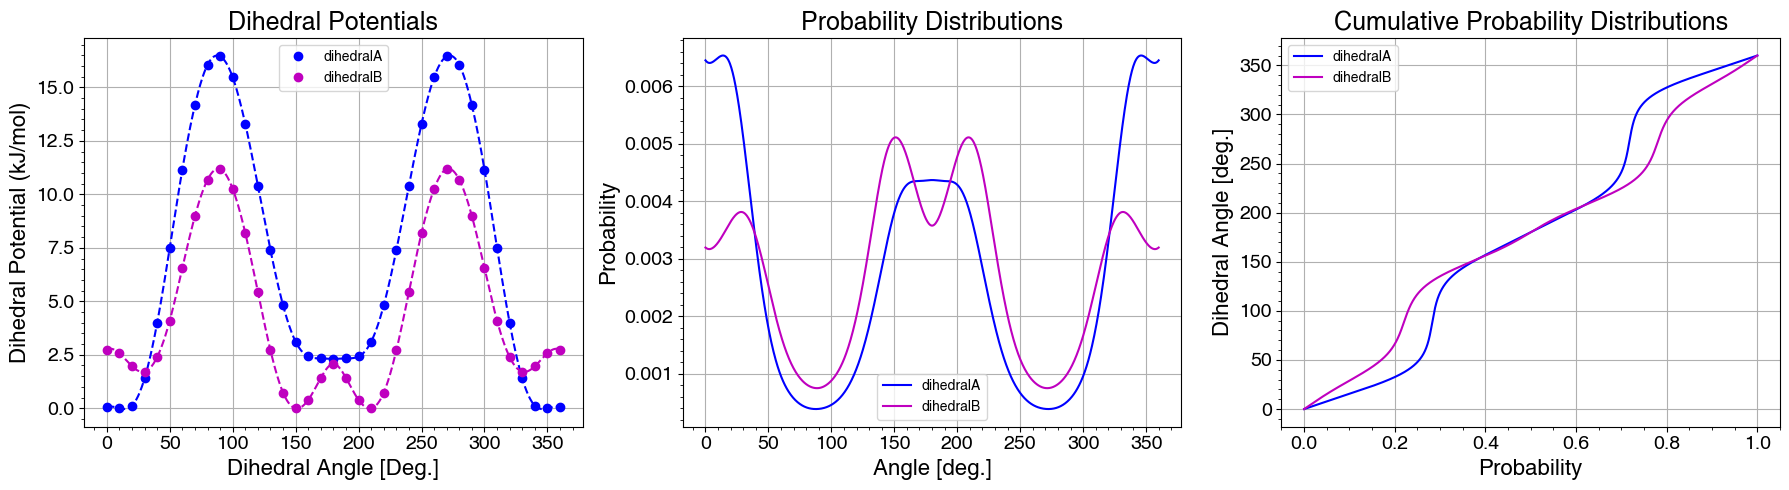

In [5]:
all_data = {}
for key, label_info in labels.items():
    all_data[key] = {**utils.setup_interpolation(label_info, kTval), **label_info}
utils.plot_dihedral_potentials(all_data)

In [6]:
lp_repeats, lam = utils.compute_persistence_in_repeats(all_data=all_data,
                                                       l_list=l,
                                                       Angle_rad=Angle,
                                                       rotation_types=rotation,
                                                       kTval=kTval)

print(f"Max eigen value: lambda_max = {lam:.12f}")
print(f"Persistence length (in repeat units) = {lp_repeats:.6f}")
# Monte Carlo sampling:
# 2.76219 (dx.doi.org/10.1021/ma500923r supporting information)
# in the range of 2.65-2.78 (my optimized method, https://github.com/Swordshinehjy/DFT_persistence_length_Monte_Carlo_sampling/blob/main/pFTBT_Ref.ipynb)

Max eigen value: lambda_max = 0.692615111869
Persistence length (in repeat units) = 2.722712
